<a href="https://colab.research.google.com/github/iAmEthanMai/mask-detection-dataset/blob/main/Face_Mask_Detection_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Mask Detection using YOLOv5 on GPU 🦠**


**Step No. 1: Change runtime type**


---
Navigate to: Runtime > Change runtime type >

Select GPU and save.

You can check the GPU analytics by running the following command:

In [ ]:
!nvidia-smi

Sat Dec  5 20:51:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Step No. 2: Clone the YOLOv5 framework and install the dependencies**

---
You can clone the repository by running the following shell command:

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repository

Cloning into 'yolov5'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 3189 (delta 11), reused 16 (delta 7), pack-reused 3165
Receiving objects: 100% (3189/3189), 6.46 MiB | 22.50 MiB/s, done.
Resolving deltas: 100% (2123/2123), done.


In [ ]:
%cd /content/yolov5

/content/yolov5


install the dependencies using pip

In [ ]:
!pip install -U -r requirements.txt  # install dependencies

(you might need to restart the runtime at this point)

In [ ]:
import torch
from IPython.display import Image  # for displaying images

In [ ]:
%cd ../content/

/content


**Step No. 3: Import dataset**

---
There are many ways to upload your data: you can use Google Drive, upload directly from your machine..

In this case, we are simply going to clone the dataset from Github.

In [ ]:
!git clone https://github.com/iAmEthanMai/mask-detection-dataset.git

Cloning into 'mask-detection-dataset'...
remote: Enumerating objects: 900, done.
remote: Counting objects: 100% (900/900), done.
remote: Compressing objects: 100% (856/856), done.
remote: Total 3489 (delta 18), reused 861 (delta 2), pack-reused 2589
Receiving objects: 100% (3489/3489), 394.79 MiB | 52.04 MiB/s, done.
Resolving deltas: 100% (873/873), done.


In [ ]:
%cd /content/yolov5

/content/yolov5


**Step No. 4: Train the model**

---
Select the batch size, the number of epochs, the dataset and the model

(If you are using the cpu --device cpu)





In [ ]:
!python3 train.py --batch 1 --epochs 100 --data /content/mask-detection-dataset/data/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --weights '' --device 0

Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Namespace(adam=False, batch_size=1, bucket='', cache_images=False, cfg='/content/yolov5/models/yolov5s.yaml', data='/content/mask-detection-dataset/data/data.yaml', device='0', epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp', single_cls=False, sync_bn=False, total_batch_size=1, weights='', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2020-12-05 20:56:43.661256: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'war

**Final step: Testing**

---
Select an image from the testing image set

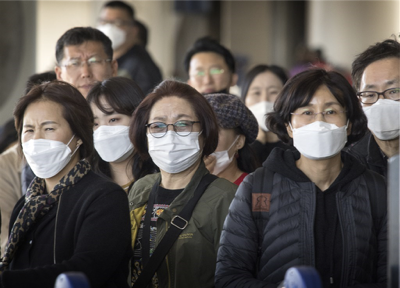

In [89]:
import PIL
PIL.Image.open('/content/mask-detection-dataset/data/images/maksssksksss787.png')

Run the following command to make a prediction

In [90]:
!python3 detect.py --source /content/mask-detection-dataset/data/images/maksssksksss787.png --weights /content/yolov5/runs/train/exp/weights/last.pt

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/mask-detection-dataset/data/images/maksssksksss787.png', update=False, view_img=False, weights=['/content/yolov5/runs/train/exp/weights/last.pt'])
Using torch 1.7.0+cu101 CUDA:0 (Tesla T4, 15079MB)

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/1 /content/mask-detection-dataset/data/images/maksssksksss787.png: 480x640 2 0s, 7 1s, Done. (0.013s)
Results saved to runs/detect/exp8
Done. (0.054s)


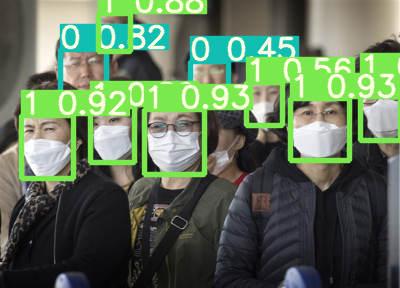

In [91]:
PIL.Image.open('/content/yolov5/runs/detect/exp8/maksssksksss787.png')